# MNIST Prediction using Deep Learning

In [38]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

X_train------>Jispe Training Hoti hai
X_test------->Jispe Testing Hoti Hai
y_train------>Outcome ki Training
y_test------->test dataset ki actual values

In [39]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [40]:
X_train.shape

(60000, 28, 28)

In [41]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

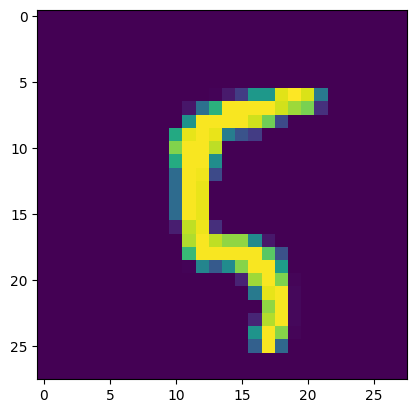

In [42]:
import matplotlib.pyplot as plt
plt.imshow(X_train[100])

In [43]:
X_train=X_train/255
X_test=X_test/255

In [44]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))

model.add(Dense(10,activation='softmax'))

adam = Adam(learning_rate=0.01)

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dropout_4 (Dropout)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109

In [48]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [49]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [50]:
history=model.fit(X_train,y_train,epochs=200,validation_split=0.2,callbacks=callback)

Epoch 1/200
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4126 - accuracy: 0.8755 - val_loss: 0.2082 - val_accuracy: 0.9406
Epoch 2/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2945 - accuracy: 0.9164 - val_loss: 0.1958 - val_accuracy: 0.9448
Epoch 3/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2757 - accuracy: 0.9238 - val_loss: 0.1619 - val_accuracy: 0.9580
Epoch 4/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2582 - accuracy: 0.9303 - val_loss: 0.1646 - val_accuracy: 0.9562
Epoch 5/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2465 - accuracy: 0.9332 - val_loss: 0.1750 - val_accuracy: 0.9572
Epoch 6/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2384 - accuracy: 0.9364 - val_loss: 0.1452 - val_accuracy: 0.9640
Epoch 7/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2403 - accuracy: 0.9364 - val_loss: 0.1624 - val_ac

In [51]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [52]:
y_prob[0]

array([1.1501766e-30, 2.0937073e-17, 3.8615867e-11, 4.6511795e-15,
       5.5422910e-19, 4.7442537e-23, 0.0000000e+00, 1.0000000e+00,
       8.6094771e-13, 3.7131951e-09], dtype=float32)

In [53]:
y_pred=y_prob.argmax(axis=1)

In [54]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9659

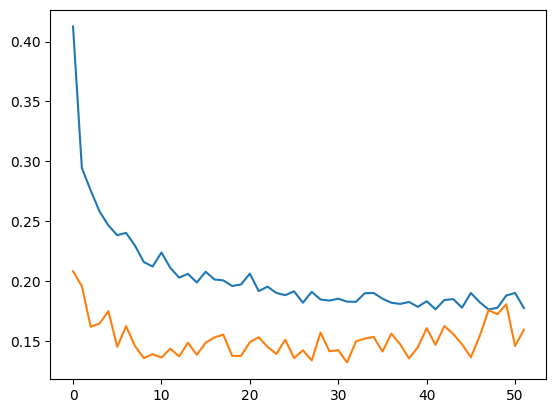

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

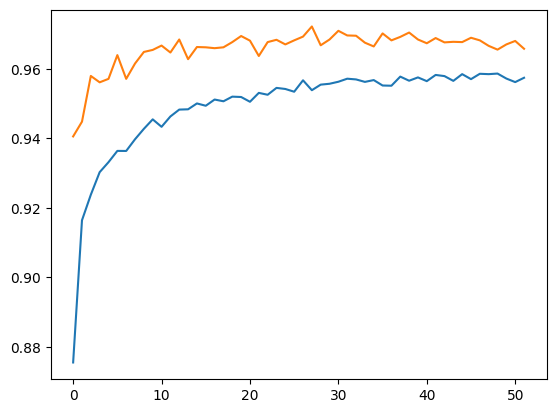

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [58]:
y_test[69]

0

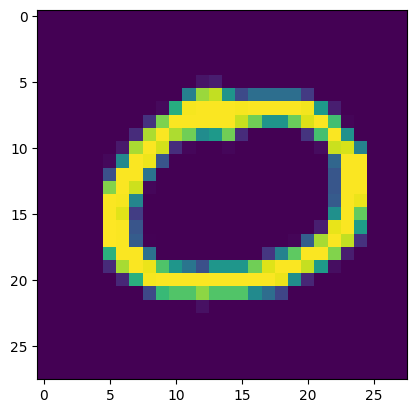

In [59]:
plt.imshow(X_test[69])

In [60]:
model.predict(X_test[69].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 69ms/step


array([0], dtype=int64)

In [61]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    